In [37]:
#Only uncomment if PuLP is not installed on local computer
#!pip install pulp

In [38]:
from pulp import *
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value

tasks = {
    "A": {"name": "Describe product", "best_case": 1, "expected": 2, "worst_case": 3},
    "B": {"name": "Develop marketing strategy", "best_case": 2, "expected": 4, "worst_case": 6},
    "C": {"name": "Design brochure", "best_case": 1, "expected": 3, "worst_case": 5},
    "D1": {"name": "Requirements analysis", "best_case": 2, "expected": 4, "worst_case": 6},
    "D2": {"name": "Software design", "best_case": 3, "expected": 5, "worst_case": 7},
    "D3": {"name": "System design", "best_case": 3, "expected": 5, "worst_case": 7},
    "D4": {"name": "Coding", "best_case": 5, "expected": 10, "worst_case": 15},
    "D5": {"name": "Write documentation", "best_case": 2, "expected": 4, "worst_case": 6},
    "D6": {"name": "Unit testing", "best_case": 2, "expected": 4, "worst_case": 6},
    "D7": {"name": "System testing", "best_case": 3, "expected": 5, "worst_case": 7},
    "D8": {"name": "Package deliverables", "best_case": 1, "expected": 2, "worst_case": 3},
    "E": {"name": "Survey potential market", "best_case": 3, "expected": 5, "worst_case": 7},
    "F": {"name": "Develop pricing plan", "best_case": 2, "expected": 4, "worst_case": 6},
    "G": {"name": "Develop implementation plan", "best_case": 2, "expected": 4, "worst_case": 6},
    "H": {"name": "Write client proposal", "best_case": 1, "expected": 2, "worst_case": 3}
}


predecessors = {
    "A": [],
    "B": [],
    "C": ["A"],
    "D1": ["A"],
    "D2": ["D1"],
    "D3": ["D1"],
    "D4": ["D2", "D3"],
    "D5": ["D4"],
    "D6": ["D4"],
    "D7": ["D6"],
    "D8": ["D5", "D7"],
    "E": ["B", "C"],
    "F": ["D8", "E"],
    "G": ["A", "D8"],
    "H": ["F", "G"]
}

--- BEST_CASE SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 20.0 hours in duration

Solution variable values:
end_A = 1.0
end_B = 2.0
end_C = 2.0
end_D1 = 3.0
end_D2 = 6.0
end_D3 = 6.0
end_D4 = 11.0
end_D5 = 13.0
end_D6 = 13.0
end_D7 = 16.0
end_D8 = 17.0
end_E = 5.0
end_F = 19.0
end_G = 19.0
end_H = 20.0
start_A = 0.0
start_B = 0.0
start_C = 1.0
start_D1 = 1.0
start_D2 = 3.0
start_D3 = 3.0
start_D4 = 6.0
start_D5 = 11.0
start_D6 = 11.0
start_D7 = 13.0
start_D8 = 16.0
start_E = 2.0
start_F = 17.0
start_G = 17.0
start_H = 19.0


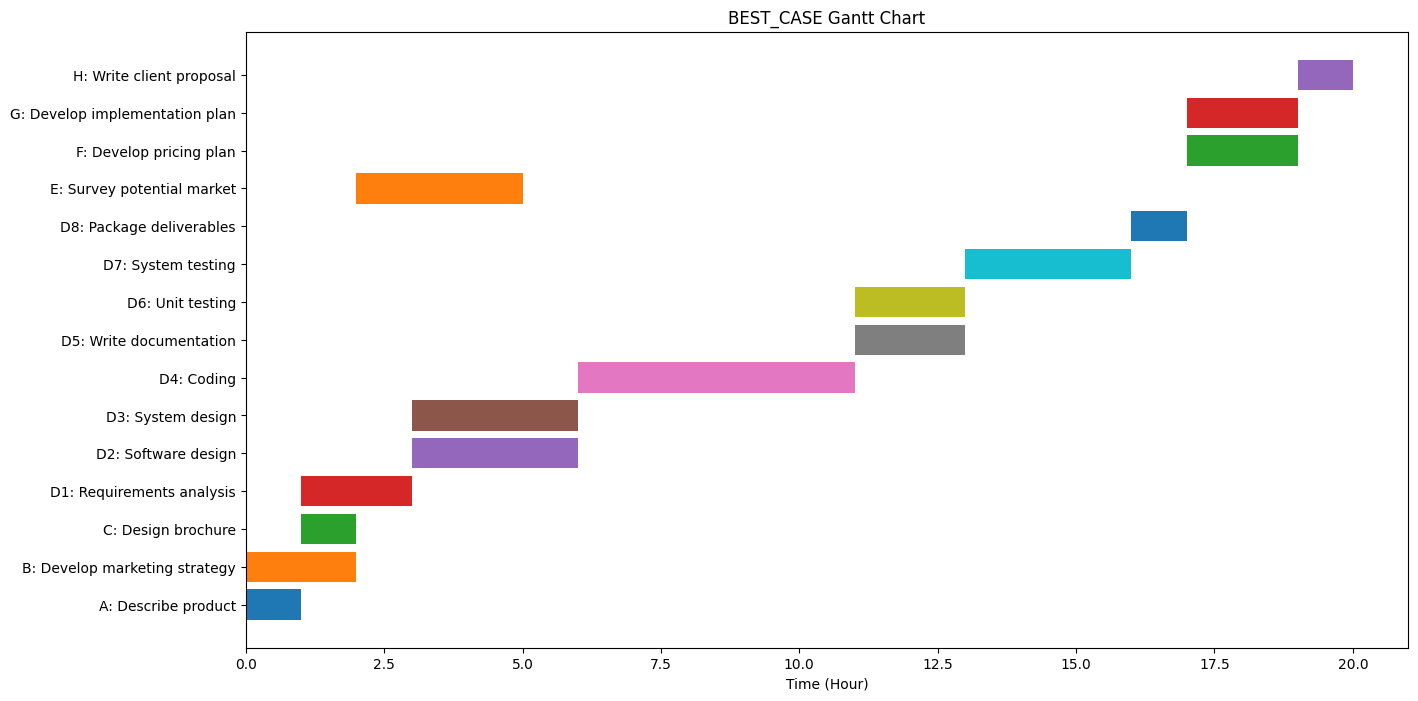


--- EXPECTED SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 38.0 hours in duration

Solution variable values:
end_A = 2.0
end_B = 4.0
end_C = 5.0
end_D1 = 6.0
end_D2 = 11.0
end_D3 = 11.0
end_D4 = 21.0
end_D5 = 25.0
end_D6 = 25.0
end_D7 = 30.0
end_D8 = 32.0
end_E = 10.0
end_F = 36.0
end_G = 36.0
end_H = 38.0
start_A = 0.0
start_B = 0.0
start_C = 2.0
start_D1 = 2.0
start_D2 = 6.0
start_D3 = 6.0
start_D4 = 11.0
start_D5 = 21.0
start_D6 = 21.0
start_D7 = 25.0
start_D8 = 30.0
start_E = 5.0
start_F = 32.0
start_G = 32.0
start_H = 36.0


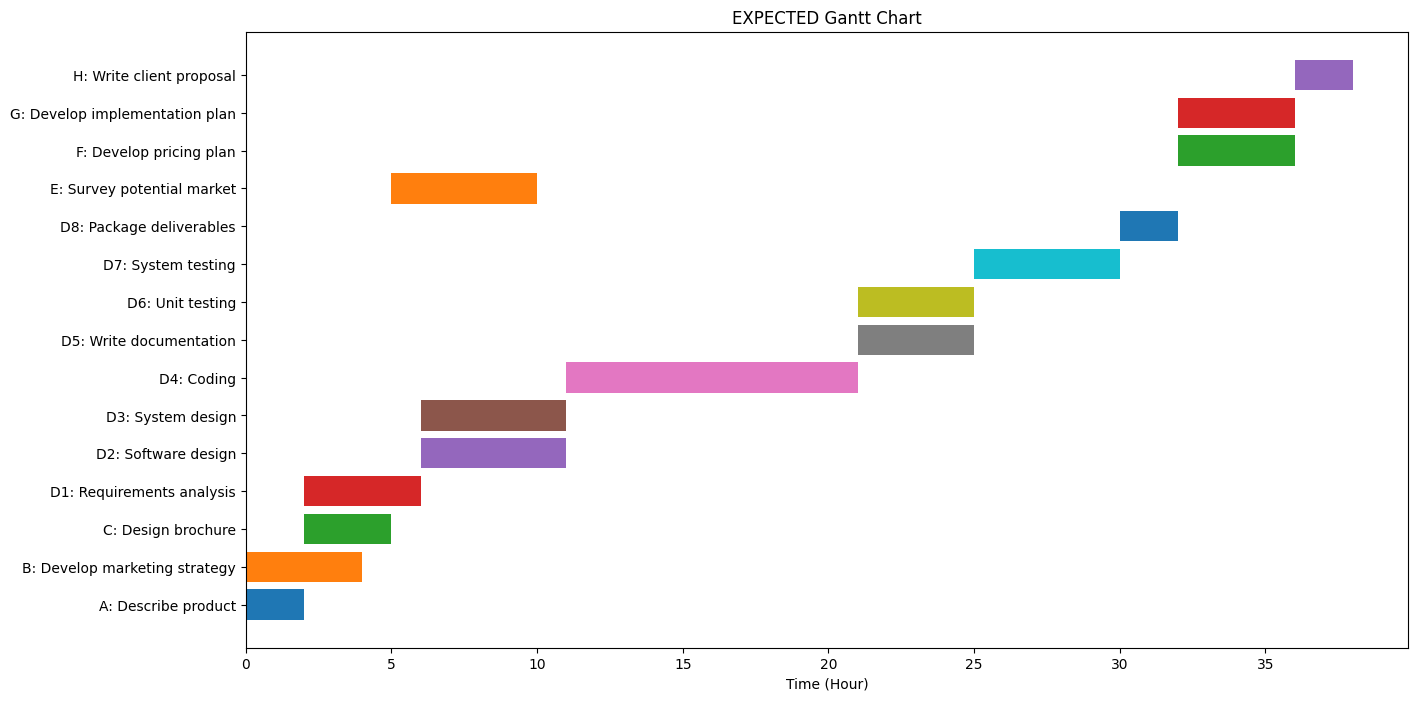


--- WORST_CASE SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 56.0 hours in duration

Solution variable values:
end_A = 3.0
end_B = 6.0
end_C = 8.0
end_D1 = 9.0
end_D2 = 16.0
end_D3 = 16.0
end_D4 = 31.0
end_D5 = 37.0
end_D6 = 37.0
end_D7 = 44.0
end_D8 = 47.0
end_E = 15.0
end_F = 53.0
end_G = 53.0
end_H = 56.0
start_A = 0.0
start_B = 0.0
start_C = 3.0
start_D1 = 3.0
start_D2 = 9.0
start_D3 = 9.0
start_D4 = 16.0
start_D5 = 31.0
start_D6 = 31.0
start_D7 = 37.0
start_D8 = 44.0
start_E = 8.0
start_F = 47.0
start_G = 47.0
start_H = 53.0


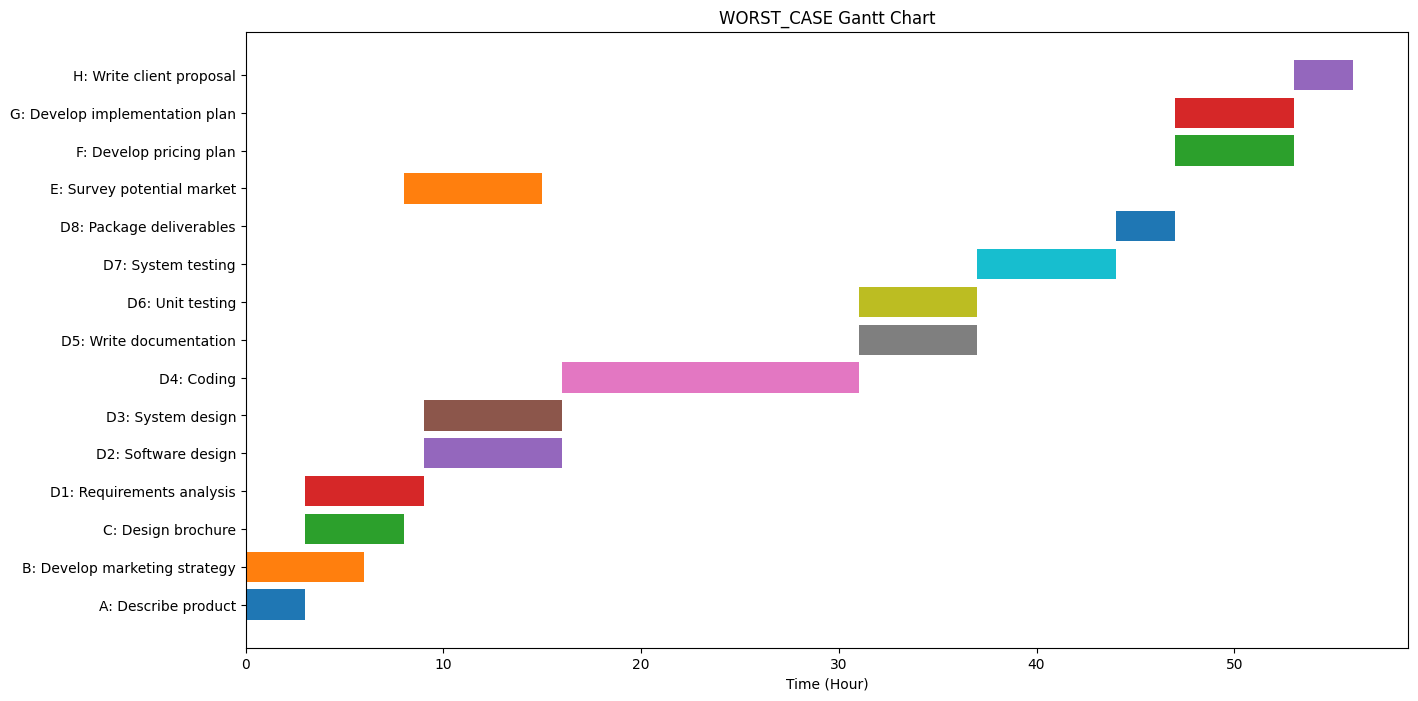

In [39]:


def critical_path_analysis(activities, predecessors, scenario="expected"):
    # Create a list of the activities
    activities_list = list(activities.keys())
    # Create the LP problem
    prob = LpProblem("Critical Path", LpMinimize)

    # Create the LP variables
    start_times = {activity: LpVariable(f"start_{activity}", 0, None) for activity in activities_list}
    end_times = {activity: LpVariable(f"end_{activity}", 0, None) for activity in activities_list}

    # Add the constraints
    for activity in activities_list:
        # Access the duration for the current scenario
        duration = activities[activity][scenario]
        prob += end_times[activity] == start_times[activity] + duration, f"{activity}_duration"
        for predecessor in predecessors[activity]:
            prob += start_times[activity] >= end_times[predecessor], f"{activity}_predecessor_{predecessor}"

    # Set the objective function
    prob += lpSum([end_times[activity] for activity in activities_list]), "minimize_end_times"

    # Solve the LP problem
    status = prob.solve()

    # Print the results
    print("Critical Path time:")
    for activity in activities_list:
        if value(start_times[activity]) == 0:
            print(f"{activity} starts at time 0")
        if value(end_times[activity]) == max([value(end_times[activity]) for activity in activities_list]):
            print(f"{activity} ends at {value(end_times[activity])} hours in duration")

    # Print solution
    print("\nSolution variable values:")
    for var in prob.variables():
        if var.name != "_dummy":
            print(var.name, "=", var.varValue)

    # Prepare data for Gantt chart
    gantt_data = []
    for activity in activities_list:
        start = value(start_times[activity])
        end = value(end_times[activity])
        gantt_data.append((activity, start, end - start))

    # Plot Gantt chart
    fig, ax = plt.subplots(figsize=(15, 8))
    for i, (task, start, duration) in enumerate(gantt_data):
      task_label = f"{task}: {activities[task]['name']}"
      ax.barh(task_label, duration, left=start, align='center')

    ax.set_xlabel('Time (Hour)')
    ax.set_title(f'{scenario.upper()} Gantt Chart')
    plt.show()

# Calculate and print the critical path for each scenario
scenarios = ["best_case", "expected", "worst_case"]
for scenario in scenarios:
    print(f"--- {scenario.upper()} SCENARIO ---")
    critical_path_analysis(tasks, predecessors, scenario)
    print()